#  Pandas 入门
<hr>

pandas 是 Python 做统计分析时最重要的数据分析工具之一，它基于 numpy 开发，提供了许多处理大型数据集所需的函数，可以灵活高效的处理各种数据集。

pandas 一般使用的数据类型为 `DataFrame`, DataFrame 是二维数据，相当于 Excel 里面的一张表格数据，使用 pandas 时首先要导入 pandas 包。

In [1]:
import pandas as pd

##  创建，读取与存储数据
<hr>

### 创建数据
<hr>

例如有下面的数据：
    
 姓名|统计学 |高数 |英语
 |:--------:|:--------:|:--------:|:--------:|
 张三 | 85 | 82 | 84  
 李四 | 68 | 63 | 90 
 王五 | 90 | 88 | 78 |

我们使用字典类型数据，将上面的读取到一个 DataFrame 里面：

In [2]:
import pandas as pd

df = pd.DataFrame(
    {
        "姓名": ["张三", "李四", "王五"],
        "统计学": [85, 68, 90],
        "高数": [82, 63, 88],
        "英语": [84, 90, 78],
    }
)
df

姓名  统计学  高数  英语
0  张三   85  82  84
1  李四   68  63  90
2  王五   90  88  78

上面的图形中，第一行是列标题，第一列是行标题，可以分别通过 ``columns`` 与 ``index`` 访问。

In [3]:
df.columns

Index(['姓名', '统计学', '高数', '英语'], dtype='object')

In [4]:
df.index

RangeIndex(start=0, stop=3, step=1)

### 读取数据
<hr>

多数情况下，我们要读取数据文件（例如 excel），假设上面的例子在 excel 文件 'transcripts.xlsx' 里并放在电脑硬盘位置“datas/” 中，可以通过函数``read_excel``读取文件：

In [5]:
import pandas as pd

# 前几行代码是为了运行 live code 而进行的设置，
# 与本章的教学内容无关
import os

if os.getcwd() == "/home/jovyan":
    os.chdir("data-science/")

# 正文
df = pd.read_excel("datas/transcripts.xlsx")

```{admonition} 注意
- 苹果电脑的文件地址用符号``/``分割，而 windows 系统的文件地址用符号``\``分割
- 文件地址前加上``r``能够保持字符串原始值的含义，而不对其中的符号进行转义
```

``read_excel`` 的一般语法如下：

<table>   
    <tr style="border-top:solid; border-bottom:solid">
            <th colspan=2 style="text-align:center">read_excel(io, sheetname=0, header=0, skiprows=None, index_col=None, encoding = None)</th>
    </tr>
    <tr>
        <td style="text-align:left">io</td>
        <td style="text-align:left">数据文件的地址与名字，一般为字符串</td>
    </tr>
    <tr>
        <td style="text-align:left">sheetname</td>
        <td style="text-align:left">工作簿名字，默认为0，表示读取第一张工作簿</td>
    </tr>
    <tr>
        <td style="text-align:left">header</td>
        <td style="text-align:left">作为列名的行，默认为0，即取第一行的值为列名</td>
    </tr>
    <tr>
        <td style="text-align:left">skiprows</td>
        <td style="text-align:left">省略指定行数的数据,从第一行开始查起</td>
    </tr>
    <tr>
        <td style="text-align:left">index_col</td>
        <td style="text-align:left">行标题所在的列</td>
    </tr>
    <tr style="border-bottom:solid">
        <td style="text-align:left">encoding</td>
        <td style="text-align:left">解码方式，一般为 'gbk'或 'utf-8'</td>
    </tr>
</table>
<br />

```{admonition} 注意
- 读取一些数据文件时，可能需要添加解码参数 encoding='gbk' 或 encoding='utf-8' 才能正确读取
```

还有一种常见的数据文件类型为 csv，我们只需使用 pandas 中的函数``read_csv``，它的语法与``read_excel``基本一致。

### 存储数据
<hr>

存储时使用函数 ``to_excel`` 或 ``to_csv``。例如我们将数据 df 仍然存储到文件夹 “datas/” 里，并命名为 “marks.xlsx”：

In [6]:
df.to_excel("datas/marks.xlsx")

- 默认情况下索引（index）不会写入文件,如果希望将索引也保存到文件中，可以通过设置`index=True`（默认是`index=False`）

## 查看与修改数据
<hr>

快速查看 DataFrame 各列数据的统计信息可以使用 ``describe()`` 函数，包括各列数据的非空数值数目、均值、标准差、最大值、最小值、分位数。

In [7]:
df.describe()

统计学         高数    英语
count   3.000000   3.000000   3.0
mean   81.000000  77.666667  84.0
std    11.532563  13.051181   6.0
min    68.000000  63.000000  78.0
25%    76.500000  72.500000  81.0
50%    85.000000  82.000000  84.0
75%    87.500000  85.000000  87.0
max    90.000000  88.000000  90.0

另外还有几个方便使用的函数：

|  函数 | 作用| 
|:--|:-- |
|``info()``| 查看各列数据的类型|
|``head()``| 查看前 5 行数据 |
|``tail()``| 查看后 5 行数据 |

### 查看单行，单列，单元格数据
<hr>

查看某一列数据时，最简单的方式是在中括号``[]``里面输入列名的方式，例如查看英语成绩那一列数据：

In [8]:
df["英语"]

0    84
1    90
2    78
Name: 英语, dtype: int64

查看某一行数据时，可以用``loc[]``函数跟行索引的方式；另外一种方式是中括号``[]``里面跟着相邻两个行索引。

In [9]:
df.loc[0]  # 显示第 1 行的数据

姓名     张三
统计学    85
高数     82
英语     84
Name: 0, dtype: object

In [10]:
df.loc[2]  # 显示第 2 行的数据

姓名     王五
统计学    90
高数     88
英语     78
Name: 2, dtype: object

In [11]:
df[0:1]  # 显示第 1 行的数据

姓名  统计学  高数  英语
0  张三   85  82  84

In [12]:
df[1:2]  # 显示第 2 行的数据

姓名  统计学  高数  英语
1  李四   68  63  90

若查看某个单元格，比较方便的方式是用两个中括号，每个中括号内分别跟着列索引和行索引，例如查看李四的高数成绩：

In [13]:
df["高数"][1]

63

或者

In [14]:
df.loc[1]["高数"]

63

### 查看多行，多列数据
<hr>

查看多行、多列数据时，可以用 ``iloc``，它不仅能查看多行多列数据，也能查看单行、单列或某个单元格数据。
例如，查看行数据：

In [15]:
df.iloc[1]  # 查看第 2 行数据
df.iloc[0:2]  # 查看前 2 行数据
df.iloc[[0, 2]]  # 查看第 1 行与第 3 行数据

姓名  统计学  高数  英语
0  张三   85  82  84
2  王五   90  88  78

查看列数据：

In [16]:
df.iloc[:, 1]  # 查看第 2 列数据
df.iloc[:, 0:2]  # 查看前 2 列数据
df.iloc[:, [0, 2]]  # 查看第 1 列与第 3 列数据

姓名  高数
0  张三  82
1  李四  63
2  王五  88

查看一块数据：

In [17]:
df.iloc[0:2, 0:2]  # 查看前 2 行，前 2 列的一块数据
df.iloc[[0, 2], [0, 2]]  # 查看第 1、第 3 行，第 1、第 3 列的一块数据
df.iloc[0:2, [0, 2]]  # 查看前 3 行，第 1、第 3 列的一块数据
df.iloc[[0, 2], 0:2]  # 第 1、第 3 行，前 2 列的一块数据

姓名  统计学
0  张三   85
2  王五   90

查看某个单元格：

In [18]:
df.iloc[1, 1]  # 查看第 2 行，第 2 列的单元格数据

68

查看具体几列数据，可以在中括号``[]``里面跟一个索引列表，例如，查看统计学与英语的成绩：

In [19]:
df[["统计学", "英语"]]

统计学  英语
0   85  84
1   68  90
2   90  78

In [20]:
df[0:3]

姓名  统计学  高数  英语
0  张三   85  82  84
1  李四   68  63  90
2  王五   90  88  78

查看具体几行数据，可以用``iloc``结合索引列表的形式，例如，查看张三与王五的成绩：

In [21]:
df.iloc[[0, 2]]

姓名  统计学  高数  英语
0  张三   85  82  84
2  王五   90  88  78

### 查看数据的统计值
<hr>

Pandas 自带一些统计函数，可以得到列数据的统计值，这些统计函数包括：mean（均值），max（最大值），min（最小值），median（中位数），std（标准差），count（计数），skew（均值），quantile（分位数）等。有时候需要添加参数``numeric_only = True``，表示只对数值数列应用函数。

In [22]:
df["统计学"].mean()  # 求出统计学课程等平均分数

81.0

In [23]:
df.mean(numeric_only=True)  # 求出每门课程等平均值，因为第一列姓名不为数值，添加了参数 ``numeric_only = True``

统计学    81.000000
高数     77.666667
英语     84.000000
dtype: float64

In [24]:
df["高数"].max()  # 求出高数课程等最高分

88

In [25]:
df.mean(numeric_only=True, axis=1)  # 通过设置 axis = 1 对行调用函数

0    83.666667
1    73.666667
2    85.333333
dtype: float64

###  修改数据
<hr>

在修改 pandas 的 DataFrame 数据时，将 pandas 的索引位置赋值为新的值。例如，当修改某列数据时，语法为：``df[‘列名'] =  某个值或某个元素个数与 DataFrame 列数相同的列表``。

In [26]:
df["统计学"] = 80  # 修改统计学这一列的数值为同一个值 80
df

姓名  统计学  高数  英语
0  张三   80  82  84
1  李四   80  63  90
2  王五   80  88  78

In [27]:
df["统计学"] = [95, 76, 88]  # 修改统计学这一列的数值为列表中的值
df

姓名  统计学  高数  英语
0  张三   95  82  84
1  李四   76  63  90
2  王五   88  88  78

In [28]:
df.iloc[1] = 80  # 修改第 2 行的数据为同一个值 80
df

姓名  统计学  高数  英语
0  张三   95  82  84
1  80   80  80  80
2  王五   88  88  78

In [29]:
df.iloc[1] = ["赵四", 95, 90, 89]  # 修改第 2 行的数据为列表中的值
df

姓名  统计学  高数  英语
0  张三   95  82  84
1  赵四   95  90  89
2  王五   88  88  78

下面的代码修改第2行第2列中的数值：

In [30]:
df.iloc[1, 1] = 100  # 修改第2行第2列中的数值
df

姓名  统计学  高数  英语
0  张三   95  82  84
1  赵四  100  90  89
2  王五   88  88  78

## 增加，删除与合并数据
<hr>

### 增加数据
<hr>

在原数据末尾增加一列时，语法为 ``df[‘新列名'] = 某个值或某个元素个数与 DataFrame 列数相同的列表``，例如：

In [31]:
df["计算机"] = [92, 69, 75]  # 增加一列计算机课程的成绩
df

姓名  统计学  高数  英语  计算机
0  张三   95  82  84   92
1  赵四  100  90  89   69
2  王五   88  88  78   75

在原数据末尾增加一行数据时，比较简单的方式是用 loc 函数，``df.loc[行索引] = 新行值``。

In [32]:
df.loc[3] = ["马六", 65, 70, 69, 55]  # 在末尾增加一行数据
df

姓名  统计学  高数  英语  计算机
0  张三   95  82  84   92
1  赵四  100  90  89   69
2  王五   88  88  78   75
3  马六   65  70  69   55

若要在指定位置插入列，则需要用到 ``insert`` 函数。

In [33]:
df.insert(1, "运筹学", [61, 72, 84, 81])  # 在第 1 列后面插入新的一列
df

姓名  运筹学  统计学  高数  英语  计算机
0  张三   61   95  82  84   92
1  赵四   72  100  90  89   69
2  王五   84   88  88  78   75
3  马六   81   65  70  69   55

In [34]:
df.insert(3, "Python", [81, 76, 74, 71])  # 在第 4 列后面插入新的一列
df

姓名  运筹学  统计学  Python  高数  英语  计算机
0  张三   61   95      81  82  84   92
1  赵四   72  100      76  90  89   69
2  王五   84   88      74  88  78   75
3  马六   81   65      71  70  69   55

若要在指定位置插入行，目前 Pandas 还没有专门的函数，一般采用``concat``函数合并多个 DataFrame 的方式，增加多列或多行数据也可以使用 ``concat``函数或``merge``函数，具体参看后面的合并数据章节。

### 删除数据
<hr>

Pandas 可以利用``drop``函数删除行数据或列数据。删除一行时，参数为行标签名以及``inplace = True``。若没有参数``inplace = True``，原始的 DataFrame 数据不变。

In [35]:
df.drop(3, inplace=True)  # 删除第 3 行
df

姓名  运筹学  统计学  Python  高数  英语  计算机
0  张三   61   95      81  82  84   92
1  赵四   72  100      76  90  89   69
2  王五   84   88      74  88  78   75

删除一列时，多了一个参数``axis = 1``：

In [36]:
df.drop("英语", inplace=True, axis=1)
df

姓名  运筹学  统计学  Python  高数  计算机
0  张三   61   95      81  82   92
1  赵四   72  100      76  90   69
2  王五   84   88      74  88   75

In [37]:
df.drop(["运筹学", "高数"], inplace=True, axis=1)  # 删除两行
df

姓名  统计学  Python  计算机
0  张三   95      81   92
1  赵四  100      76   69
2  王五   88      74   75

drop 函数还可以根据条件删除数据，例如:

In [38]:
df.drop(df[df["统计学"]>95].index, inplace=True) # 删除所有统计学成绩高于95分的成绩
df

姓名  统计学  Python  计算机
0  张三   95      81   92
2  王五   88      74   75

In [39]:
df.reset_index(drop=True) # 重新设置 index，并舍弃原有的 index

姓名  统计学  Python  计算机
0  张三   95      81   92
1  王五   88      74   75

### 合并数据
<hr>

Pandas 中比较常用的两个合并数据的方法是``concat``与``merge``。 当两个 DataFrame 数据表具有完全相同的列标签时，一般用``concat``，其他情况下多用``merge``。

In [40]:
df1 = pd.DataFrame(
    {
        "姓名": ["张三", "李四", "王五"],
        "统计学": [85, 68, 90],
        "高数": [82, 63, 88],
        "英语": [84, 90, 78],
    }
)
df1

姓名  统计学  高数  英语
0  张三   85  82  84
1  李四   68  63  90
2  王五   90  88  78

In [41]:
df2 = pd.DataFrame(
    {"姓名": ["马大帅", "陈小虎"], "统计学": [83, 59], "高数": [92, 70], "英语": [94, 78]}
)
df2

姓名  统计学  高数  英语
0  马大帅   83  92  94
1  陈小虎   59  70  78

两张表具有完全相同的列名，用``concat``合并的代码如下：

In [42]:
pd.concat([df1, df2])  #  注意中括号不等丢

姓名  统计学  高数  英语
0   张三   85  82  84
1   李四   68  63  90
2   王五   90  88  78
0  马大帅   83  92  94
1  陈小虎   59  70  78

若要合并后的 index 重新命名，可以加参数``ignore_index = True``，让合并后数据的 index 重新从小到大命名：

In [43]:
pd.concat([df1, df2], ignore_index=True)

姓名  统计学  高数  英语
0   张三   85  82  84
1   李四   68  63  90
2   王五   90  88  78
3  马大帅   83  92  94
4  陈小虎   59  70  78

- concat 默认按行合并，若按列合并，可以在小括号内添加参数`axis=1`

假如有下面的数据：

In [44]:
df3 = pd.DataFrame({"姓名": ["张三", "李四", "王五"], "会计": [75, 78, 80], "管理学": [94, 96, 88]})
df3

姓名  会计  管理学
0  张三  75   94
1  李四  78   96
2  王五  80   88

df1 与 df3 的姓名相同，但列名不完全相同。我们想把 df3 的列添加到 df1 中，此时就要使用``merge``方法了，它的使用语法一般如下：

<table>
    <tr style="border-top:solid; border-bottom:solid">
            <th colspan=2 style="text-align:center">DataFrame.merge(right, how='inner', on=None)</th>
    </tr>
    <tr>
        <td style="text-align:left">right</td>
        <td style="text-align:left">需要合并的另一个 DataFrame 数据</td>
    </tr>
    <tr>
        <td rowspan=4 style="text-align:left">how</td>
        <td style="text-align:left">默认为 'inner'，表示内连接，取两个数据表中匹配字段的交集进行合并</td>
    </tr>
    <tr>
        <td style="text-align:left">'outer'，表示外连接，取两个数据表中匹配字段的并集进行合并</td>
    </tr>
    <tr>
        <td style="text-align:left">'left'，表示左连接，取左边数据表中匹配字段进行合并</td>
    </tr>
    <tr>
        <td style="text-align:left">'right'，表示右连接，取右边数据表中匹配字段进行合并</td>
    </tr>
    <tr style="border-bottom:solid">
        <td  style="text-align:left">on</td>
        <td style="text-align:left">匹配的字段（列），可以是一个或多个</td>
    </tr>
</table>
</br>

因此，对于 df1 与 df3，用``merge``合并时，匹配的字段（列名）为'姓名'：

In [45]:
df1.merge(df3, on="姓名")

姓名  统计学  高数  英语  会计  管理学
0  张三   85  82  84  75   94
1  李四   68  63  90  78   96
2  王五   90  88  78  80   88

``merge``也能实现``concat``的合并效果，例如，合并 df1 与 df2：

In [46]:
df1.merge(df2, on=["姓名", "统计学", "高数", "英语"], how="outer")

姓名  统计学  高数  英语
0   张三   85  82  84
1   李四   68  63  90
2   王五   90  88  78
3  陈小虎   59  70  78
4  马大帅   83  92  94

在上面的代码中，匹配的字段为所有的列，连接方式为外连接，实现结果与``concat``相同。若连接方式为其他类型，显示效果如下：

In [47]:
df1.merge(df2, on=["姓名", "统计学", "高数", "英语"], how="inner")  # 内连接时两个数据表匹配字段的交集为空

Empty DataFrame
Columns: [姓名, 统计学, 高数, 英语]
Index: []

In [48]:
df1.merge(df2, on=["姓名", "统计学", "高数", "英语"], how="left")  # 左连接时保留左数据表的所有匹配字段

姓名  统计学  高数  英语
0  张三   85  82  84
1  李四   68  63  90
2  王五   90  88  78

In [49]:
df1.merge(df2, on=["姓名", "统计学", "高数", "英语"], how="right")  # 右连接时保留右数据表的所有匹配字段

姓名  统计学  高数  英语
0  马大帅   83  92  94
1  陈小虎   59  70  78

在合并数据表时，若某些字段没有对应数据，Pandas 会自动用 NaN 替代，下面的例子展示了不同连接方式的效果。

In [50]:
df1 = pd.DataFrame(
    {
        "班级": ["一班", "二班", "一班"],
        "姓名": ["张三", "李四", "王五"],
        "性别": ["男", "男", "女"],
        "籍贯": ["北京", "上海", "重庆"],
    }
)
df1

班级  姓名 性别  籍贯
0  一班  张三  男  北京
1  二班  李四  男  上海
2  一班  王五  女  重庆

In [51]:
df2 = pd.DataFrame({"姓名": ["张三", "陈小虎"], "统计学": [85, 59]})
df2

姓名  统计学
0   张三   85
1  陈小虎   59

In [52]:
df1.merge(df2, on="姓名")

班级  姓名 性别  籍贯  统计学
0  一班  张三  男  北京   85

In [53]:
df1.merge(df2, on="姓名", how="outer")  # 某些字段没有对应数据，则显示为 NaN

班级   姓名   性别   籍贯   统计学
0   一班   张三    男   北京  85.0
1   二班   李四    男   上海   NaN
2   一班   王五    女   重庆   NaN
3  NaN  陈小虎  NaN  NaN  59.0

In [54]:
df1.merge(df2, on="姓名", how="left")

班级  姓名 性别  籍贯   统计学
0  一班  张三  男  北京  85.0
1  二班  李四  男  上海   NaN
2  一班  王五  女  重庆   NaN

In [55]:
df1.merge(df2, on="姓名", how="right")

班级   姓名   性别   籍贯  统计学
0   一班   张三    男   北京   85
1  NaN  陈小虎  NaN  NaN   59

## 查询，排序，分组汇总数据
<hr>

### 查询数据
<hr>

对 DataFrame 数据按照一定条件查询时，一般会用到一些比较运算符，例如：>, >=, ==, <, <=, !=。条件查询一般只针对列数据，查询时，Pandas 首先生成布尔索引 True 或 False，再通过指定索引生成查询后的数据。

例如，下面的代码：

In [56]:
import pandas as pd

df = pd.DataFrame(
    {
        "姓名": ["张三", "李四", "王五"],
        "统计学": [85, 68, 90],
        "高数": [82, 63, 88],
        "英语": [84, 90, 78],
    }
)
df

姓名  统计学  高数  英语
0  张三   85  82  84
1  李四   68  63  90
2  王五   90  88  78

In [57]:
df["统计学"] > 83  # 统计学成绩大于83的布尔索引

0     True
1    False
2     True
Name: 统计学, dtype: bool

In [58]:
df[df["统计学"] > 83]  # 生成统计学成绩大于83的数据

姓名  统计学  高数  英语
0  张三   85  82  84
2  王五   90  88  78

对于多条件查询，可以用``&``表示并：两个条件都要满足，用``|``表示或：两个条件满足一个即可。举例：

In [59]:
df[(df["高数"] > 65) & (df["英语"] > 80)]  # 查询高数成绩大于65，英语成绩大于80的数据，注意小括号

姓名  统计学  高数  英语
0  张三   85  82  84

In [60]:
df[(df["高数"] > 65) | (df["英语"] > 80)]  # 查询高数成绩大于65，英语成绩大于80的数据，注意小括号

姓名  统计学  高数  英语
0  张三   85  82  84
1  李四   68  63  90
2  王五   90  88  78

### 排序数据
<hr>

在处理数据时，经常要对数据排序。 Pandas 提供了一个方便的函数``sort_values``对数值进行排序，它的使用语法如下：

<table>
     <tr style="border-top:solid; border-bottom:solid">
            <th colspan=2 style="text-align:center">DataFrame.sort_values(by, axis=0, ascending=True, inplace=False,  na_position='last', ignore_index=False)</th>
    </tr>
    <tr>
        <td style="text-align:left">by</td>
        <td style="text-align:left">需要排序的列名(axis=0)或行名(axis=1)，可以有多个</td>
    </tr>
    <tr>
        <td style="text-align:left">axis</td>
        <td style="text-align:left">0 表示对列排序，1 表示对行排序，默认是0</td>
    </tr>
    <tr>
        <td style="text-align:left">ascending</td>
        <td style="text-align:left">升序还是降序，默认是升序排列</td>
    </tr>
    <tr>
        <td style="text-align:left">inplace</td>
        <td style="text-align:left">是否替换原有数据，默认为 False 不替换</td>
    </tr>
    <tr>
        <td style="text-align:left">na_position</td>
        <td style="text-align:left">缺失值 NaN 放在排序的前面还是后面，默认是放在后面</td>
    </tr>
    <tr style="border-bottom:solid">
        <td style="text-align:left">ignore_index</td>
        <td style="text-align:left">如果为 True，则排序后的行号重新标号，默认是 False</td>
    </tr>
</table>
</br>

对统计学成绩升序排列：

In [61]:
df.sort_values(by="统计学")

姓名  统计学  高数  英语
1  李四   68  63  90
0  张三   85  82  84
2  王五   90  88  78

对统计学与高数成绩降序排序：

In [62]:
df.sort_values(by=["统计学", "高数"], ascending=False)

姓名  统计学  高数  英语
2  王五   90  88  78
0  张三   85  82  84
1  李四   68  63  90

在参数``by``中，统计学在前，高数在后，表示：先把统计学成绩降序排序，若统计学成绩有相同的，再按高数成绩降序排序。

由于排序时列标签经常被打乱，可以使用``ignore_index = True``重新排列标签，``inplace = True``改变原始数据。

In [63]:
df.sort_values(by="统计学")  # 排序，可以看出列标也发生了变动

姓名  统计学  高数  英语
1  李四   68  63  90
0  张三   85  82  84
2  王五   90  88  78

In [64]:
df.sort_values(by="统计学", ignore_index=True)  # 排序后重新排列标签

姓名  统计学  高数  英语
0  李四   68  63  90
1  张三   85  82  84
2  王五   90  88  78

In [65]:
df.sort_values(by="统计学", ignore_index=True)  # 排序后，没有替换原始数据
df

姓名  统计学  高数  英语
0  张三   85  82  84
1  李四   68  63  90
2  王五   90  88  78

In [66]:
df.sort_values(by="统计学", ignore_index=True, inplace=True)  # 排序后，替换了原始数据
df

姓名  统计学  高数  英语
0  李四   68  63  90
1  张三   85  82  84
2  王五   90  88  78

### 分组汇总`groupby`
<hr>

在数据分析时，经常也需要将数据分组汇总。例如，在统计学生的期末考试成绩时，可能需要根据专业或者班级来分别计算平均成绩、最高成绩等。此时，可以利用 Pandas 的``groupby``函数方便地实现这些功能。

groupby 经常结合一些汇总统计量使用，例如 mean（均值），max（最大值），min（最小值），median（中位数），std（标准差），mad（平均绝对偏差），count（计数），size(也是计数), skew（均值），quantile（分位数）。

下面的代码按性别汇总了平均成绩：

In [67]:
df = pd.DataFrame(
    [
        ["张三", "一班", "男", 85, 68, 90],
        ["李四", "二班", "男", 82, 63, 88],
        ["王五", "二班", "女", 84, 90, 78],
        ["魏小小", "三班", "女", 75, 68, 80],
        ["马小倩", "二班", "女", 69, 55, 63],
        ["陈小虎", "一班", "男", 89, 95, 93],
    ],
    columns=["姓名", "班级", "性别", "统计学", "高数", "英语"],
)
df

姓名  班级 性别  统计学  高数  英语
0   张三  一班  男   85  68  90
1   李四  二班  男   82  63  88
2   王五  二班  女   84  90  78
3  魏小小  三班  女   75  68  80
4  马小倩  二班  女   69  55  63
5  陈小虎  一班  男   89  95  93

In [68]:
df.groupby("性别").count()

姓名  班级  统计学  高数  英语
性别                     
女    3   3    3   3   3
男    3   3    3   3   3

In [69]:
df.groupby("性别").size()  # 与 count 略有区别

性别
女    3
男    3
dtype: int64

In [70]:
df2 = df.groupby("性别").size()
df2

性别
女    3
男    3
dtype: int64

In [71]:
df.groupby("性别").mean(
    numeric_only=True
)  # 按性别汇总平均成绩, numeric_only = True 表示仅选择对函数有效的数据列

统计学         高数         英语
性别                                 
女   76.000000  71.000000  73.666667
男   85.333333  75.333333  90.333333

In [72]:
df.groupby(["班级", "性别"]).mean(numeric_only=True)  # 按班级、性别汇总平均成绩

统计学    高数    英语
班级 性别                  
一班 男   87.0  81.5  91.5
三班 女   75.0  68.0  80.0
二班 女   76.5  72.5  70.5
   男   82.0  63.0  88.0

也可以将汇总后的数据赋值给一个新的 DataFrame 变量：

In [73]:
df2 = df.groupby(["班级", "性别"]).mean(numeric_only=True)  # 按班级、性别汇总平均成绩
df2

统计学    高数    英语
班级 性别                  
一班 男   87.0  81.5  91.5
三班 女   75.0  68.0  80.0
二班 女   76.5  72.5  70.5
   男   82.0  63.0  88.0

In [74]:
df2.index

MultiIndex([('一班', '男'),
            ('三班', '女'),
            ('二班', '女'),
            ('二班', '男')],
           names=['班级', '性别'])

汇总后，发现分类汇总的类别作为新的 index 了（一列或多列分类汇总都是这样）。可以通过加一个参数`as_index=False`设置。

In [75]:
df2 = df.groupby(["班级", "性别"], as_index=False).mean(numeric_only=True)  # 按班级、性别汇总平均成绩
df2

班级 性别   统计学    高数    英语
0  一班  男  87.0  81.5  91.5
1  三班  女  75.0  68.0  80.0
2  二班  女  76.5  72.5  70.5
3  二班  男  82.0  63.0  88.0

若要汇总多个统计量，则可以跟``agg``方法，例如，下面的代码按照班级与性别，汇总了每个班的最高、最低、平均成绩。

In [76]:
df2.groupby(["班级", "性别"]).agg(["max", "min", "mean"], numeric_only=True)  # 汇总了每个班每个性别的最高、最低、平均成绩

统计学                高数                英语            
        max   min  mean   max   min  mean   max   min  mean
班级 性别                                                      
一班 男   87.0  87.0  87.0  81.5  81.5  81.5  91.5  91.5  91.5
三班 女   75.0  75.0  75.0  68.0  68.0  68.0  80.0  80.0  80.0
二班 女   76.5  76.5  76.5  72.5  72.5  72.5  70.5  70.5  70.5
   男   82.0  82.0  82.0  63.0  63.0  63.0  88.0  88.0  88.0

### ``reset_index``函数
<hr>

也可以在 groupby 函数后面再使用函数`reset_index`将多个index作为新的列标题。 

In [77]:
df2 = df.groupby(["班级", "性别"]).mean(numeric_only=True).reset_index()  # 按班级、性别汇总平均成绩
df2

班级 性别   统计学    高数    英语
0  一班  男  87.0  81.5  91.5
1  三班  女  75.0  68.0  80.0
2  二班  女  76.5  72.5  70.5
3  二班  男  82.0  63.0  88.0

函数`reset_index`可以跟`drop=True`参数去除 index。

In [78]:
df2 = (
    df.groupby(["班级", "性别"]).mean(numeric_only=True).reset_index(drop=True)
)  # 按班级、性别汇总平均成绩
df2

统计学    高数    英语
0  87.0  81.5  91.5
1  75.0  68.0  80.0
2  76.5  72.5  70.5
3  82.0  63.0  88.0

函数`reset_index`还可以跟 names 参数重新定义列标题的名字。

In [79]:
df2 = (
    df.groupby(["班级", "性别"]).mean(numeric_only=True).reset_index(names=["class", "sex"])
)  # 按班级、性别汇总平均成绩
df2

class sex   统计学    高数    英语
0    一班   男  87.0  81.5  91.5
1    三班   女  75.0  68.0  80.0
2    二班   女  76.5  72.5  70.5
3    二班   男  82.0  63.0  88.0

In [80]:
df2.columns

Index(['class', 'sex', '统计学', '高数', '英语'], dtype='object')

## 与数组或列表的转换
<hr>

使用 Pandas 中的``values``方法可以将 DataFrame 数据转化为 Numpy 的数组形式。例如，对于前面的数据例子：

In [81]:
df = pd.DataFrame(
    {
        "姓名": ["张三", "李四", "王五"],
        "统计学": [85, 68, 90],
        "高数": [82, 63, 88],
        "英语": [84, 90, 78],
    }
)
df[["统计学", "高数", "英语"]].values

array([[85, 82, 84],
       [68, 63, 90],
       [90, 88, 78]])

也可以对某列数据，使用``tolist()``方法，将该列数据转化为 Python 本身的列表类型 list：

In [82]:
df["统计学"].tolist()

[85, 68, 90]

除了字典类型外，Pandas 也支持将一维或二维的数组或列表转化成 DataFrame 类型。

In [83]:
a = [1, 2, 3]
pd.DataFrame(a)

0
0  1
1  2
2  3

In [84]:
a = [[1, 2, 3], [4, 5, 6]]
pd.DataFrame(a)

0  1  2
0  1  2  3
1  4  5  6

In [85]:
import numpy as np

b = np.array([3, 3, 4])
pd.DataFrame(b)

0
0  3
1  3
2  4

In [86]:
c = np.matrix([[1, 2], [3, 4]])
pd.DataFrame(c)

0  1
0  1  2
1  3  4

## 自定义函数
<hr>

Pandas 可以使用``apply``调用自定义函数。

In [87]:
import numpy as np

df["统计学"].apply(np.sqrt)  # 调用 Numpy 中的求平方根函数对统计学成绩每个元素求平方根

0    9.219544
1    8.246211
2    9.486833
Name: 统计学, dtype: float64

我们也可以使用``lambda``定义一个匿名函数在``apply``里面调用：

In [88]:
df["高数新"] = df["高数"].apply(lambda x: x - 10)  # 对每一个高数成绩都减去 10 分，并赋值给一个新的列

``apply`` 也可以调用更复杂的自定义函数，例如，下面定义一个成绩替换函数，将分数替换为"优良中差"：

In [89]:
def replace_score(x):
    if x >= 90:
        return "优"
    elif x >= 80:
        return "良"
    elif x >= 60:
        return "中"
    else:
        return "差"


df["英语"].apply(replace_score)

0    良
1    优
2    中
Name: 英语, dtype: object

## 数据清洗
<hr>

### 数据替换``replace``, ``fillna``
<hr>

在进行数据处理时，经常需要对原始数据的一些异常值或错误值进行批量处理。 Pandas 提供了``replace``函数方便地进行这项操作。``replace``函数第一项为原数据中的值，第二项为需要替换的值。例如，有下面的学生成绩：

In [90]:
import pandas as pd
import numpy as np

df = pd.DataFrame(
    np.array([[85, 68, 90], [82, 63, 88], [84, 90, 78]]),
    columns=["统计学", "高数", "英语"],
    index=["张三", "李四", "王五"],
)
df

统计学  高数  英语
张三   85  68  90
李四   82  63  88
王五   84  90  78

将其中的分数 90 替换为缺失值 NaN，注意，``replace``返回了一个新的数据，但原始数据并没有改变。

In [91]:
df.replace(90, np.nan)

统计学    高数    英语
张三   85  68.0   NaN
李四   82  63.0  88.0
王五   84   NaN  78.0

In [92]:
df  # 原始数据并没有变

统计学  高数  英语
张三   85  68  90
李四   82  63  88
王五   84  90  78

若需要原始数据改变，需要跟上参数``inplace = True ``，下面讲到的函数``fillna ``、``drop_duplicates``、``dropna``、 ``rename``等也可以跟这个参数将原始数据改变。

In [93]:
df.replace(90, np.nan, inplace=True)
df  # 原始数据改变了

统计学    高数    英语
张三   85  68.0   NaN
李四   82  63.0  88.0
王五   84   NaN  78.0

Pandas 提供``fillna``函数批量替换数据表中的缺失值 NaN。例如：

In [94]:
df.fillna(80)  # 将缺失值替换为 80

统计学    高数    英语
张三   85  68.0  80.0
李四   82  63.0  88.0
王五   84  80.0  78.0

In [95]:
df.fillna("missing")  # 将缺失值替换为一个字符串

统计学       高数       英语
张三   85     68.0  missing
李四   82     63.0     88.0
王五   84  missing     78.0

Pandas 还可以直接调用``isnull``函数判断数据是否为缺失值：

In [96]:
df["英语"].isnull()

张三     True
李四    False
王五    False
Name: 英语, dtype: bool

### 数据类型转换 ``astype``
<hr>

很多时候，我们需要对原始数据进行数据转换。例如，一些原始数据中的数字为文本类型，我们需要讲它们转化为数值类型才能进行之后的计算操作。常见的数据类型转换函数为``astype``。


In [97]:
import pandas as pd
import numpy as np

df = pd.DataFrame(
    np.array([["85", "68", "90"], ["82", "63", "88"], ["84", "90", "78"]]),
    columns=["统计学", "高数", "英语"],
    index=["张三", "李四", "王五"],
)
df

统计学  高数  英语
张三  85  68  90
李四  82  63  88
王五  84  90  78

In [98]:
print(df.dtypes)

统计学    object
高数     object
英语     object
dtype: object


上面的 pandas 数据为文本类型，我们利用``astype``将其转化为浮点型数值类型。

In [99]:
df = df[["统计学", "高数", "英语"]].astype(float)
df

统计学    高数    英语
张三  85.0  68.0  90.0
李四  82.0  63.0  88.0
王五  84.0  90.0  78.0

In [100]:
print(df.dtypes)

统计学    float64
高数     float64
英语     float64
dtype: object


改变`as_type`小括号中的参数为 int，str等，我们同样可以将原始数据转化为整数型，字符串型等。

### 重复值处理``drop_duplicates``
<hr>

在数据量比较大时，经常会遇到重复数据的问题，可以使用函数``drop_duplicates``将重复数据去掉。例如：

In [101]:
df = pd.DataFrame(
    [
        ["一班", "男", 85, 68, 90],
        ["一班", "男", 85, 68, 90],
        ["二班", "女", 84, 90, 78],
        ["三班", "女", 75, 68, 80],
        ["二班", "女", 69, 55, 63],
        ["一班", "男", 89, 95, 93],
    ],
    columns=["班级", "性别", "统计学", "高数", "英语"],
    index=["张三", "张三", "王五", "马六", "陈小虎", "魏大帅"],
)
df

班级 性别  统计学  高数  英语
张三   一班  男   85  68  90
张三   一班  男   85  68  90
王五   二班  女   84  90  78
马六   三班  女   75  68  80
陈小虎  二班  女   69  55  63
魏大帅  一班  男   89  95  93

前两行的数据完全相同，使用函数``drop_duplicates``处理：

In [102]:
df.drop_duplicates()

班级 性别  统计学  高数  英语
张三   一班  男   85  68  90
王五   二班  女   84  90  78
马六   三班  女   75  68  80
陈小虎  二班  女   69  55  63
魏大帅  一班  男   89  95  93

``drop_duplicates``的语法如下：

<table>
     <tr style="border-top:solid; border-bottom:solid">
            <th colspan=2 style="text-align:center">DataFrame.drop_duplicates(keep='first', inplace=False, ignore_index=False)</th>
    </tr>
    <tr>
        <td rowspan=3 style="text-align:left">keep</td>
        <td style="text-align:left">'fist'表示除了第一个重复的行都删除</td>
    </tr>
    <tr>
        <td style="text-align:left">'last'表示除了最后一个重复的行都删除</td>
    </tr>
    <tr>
        <td style="text-align:left">False 表示删除所有重复的行</td>
    </tr>
    <tr>
        <td style="text-align:left">inplace</td>
        <td style="text-align:left">若 inplace=True，表示处理后的数据替换原数据</td>
    </tr>
    <tr style="border-bottom:solid">
        <td style="text-align:left">ignore_index</td>
        <td style="text-align:left">如果为 True，则排序后的行号重新标号，默认是 False</td>
    </tr>
</table>
</br>

### 缺失值处理``drop_na``
<hr>

``dropna``函数可以将数据表中包含缺失值的行去除掉，与``drop_duplicates``的语法类似。它的语法如下：

<table>
     <tr style="border-top:solid; border-bottom:solid">
            <th colspan=2 style="text-align:center">DataFrame.dropna(axis=0, how='any', thresh=None, inplace=False, ignore_index=False)</th>
    </tr>
    <tr>
        <td style="text-align:left">axis</td>
        <td style="text-align:left">axis=0 表示删除含空值所在行，axis=1 表示删除含空值所在列</td>
    </tr>
    <tr>
        <td rowspan=2 style="text-align:left">how</td>
        <td style="text-align:left">默认为 how='any'，表示若有空值，就删除</td>
    </tr>
    <tr>  
        <td style="text-align:left">how='all'，表示全部是空值才删除该行或该列</td>
    </tr>
    <tr>
        <td style="text-align:left">thresh</td>
        <td style="text-align:left">空值的个数，作为行或列的删除标准</td>
    </tr>
    <tr>
        <td style="text-align:left">inplace</td>
        <td style="text-align:left">若 inplace=True，表示处理后的数据替换原数据</td>
    </tr>
    <tr style="border-bottom:solid">
        <td style="text-align:left">ignore_index</td>
        <td style="text-align:left">如果为 True，则排序后的行号重新标号，默认是 False</td>
    </tr>
</table>
</br>

In [103]:
df = pd.DataFrame(
    {"统计学": [85, 68, np.nan], "高数": [82, 75, 88], "英语": [np.nan, 90, 78]},
    index=["张三", "李四", "王五"],
)
df

统计学  高数    英语
张三  85.0  82   NaN
李四  68.0  75  90.0
王五   NaN  88  78.0

In [104]:
df.dropna()  # 默认为删除含有空值的行，并且只要行里面有 Nan 值，就删除

统计学  高数    英语
李四  68.0  75  90.0

In [105]:
df.dropna(axis=1)  # 删除含有空值的列

高数
张三  82
李四  75
王五  88

In [106]:
df.dropna(how="all")  # 全部是空值才删除

统计学  高数    英语
张三  85.0  82   NaN
李四  68.0  75  90.0
王五   NaN  88  78.0

### 重命名``rename``
<hr>

在处理数据表时，有时候要给数据的行名或列名重命名，此时要用到``rename``函数，``rename``函数中的参数为一个字典形式：替换前的名字为字典的 key，替换后的名字为字典的 value。

In [107]:
df = pd.DataFrame({"统计学": [85, 68, 90], "高数": [82, 63, 88], "英语": [84, 90, 78]})
df

统计学  高数  英语
0   85  82  84
1   68  63  90
2   90  88  78

In [108]:
df.rename(columns={"统计学": "科目A", "高数": "科目B"})  # 更改其中两列的列名

科目A  科目B  英语
0   85   82  84
1   68   63  90
2   90   88  78

```{admonition} tip
:class: tip
若要处理后的数据替换原数据，则要加参数``inplace=True``
```

##  时间序列数据处理
<hr>

### ``to_datetime`` 与 ``dt.strftime``
<hr>

实际工作中，经常会遇到大量的时间序列数据。这些时间序列的原始数据一般为文本格式，我们需要将它转化为时间日期格式。 Pandas 提供了 ``to_datetime``函数将其他日期时间格式转化为 Python 的日期时间格式。例如：

In [109]:
import pandas as pd

pd.to_datetime("20200514")

Timestamp('2020-05-14 00:00:00')

In [110]:
pd.to_datetime("2020/05/14")

Timestamp('2020-05-14 00:00:00')

In [111]:
pd.to_datetime("2020-05-14")

Timestamp('2020-05-14 00:00:00')

在上面的代码中可以看出，``to_datetime``方法将不同类型的时间数据字符串转化为 Timestamp 格式：``年-月-日 时:分:秒``。另外一个函数``dt.strftime``可以将 Pandas 的 Timestamp 格式数据转化为其他格式的字符串，例如：

In [112]:
df = pd.DataFrame(
    {
        "入校时间": ["2016-09-15", "2017-03-23", "2018-09-05"],
        "统计学": [85, 68, 90],
        "高数": [82, 63, 88],
        "英语": [84, 90, 78],
        "姓名": ["张三", "李四", "王五"],
    }
)
df

入校时间  统计学  高数  英语  姓名
0  2016-09-15   85  82  84  张三
1  2017-03-23   68  63  90  李四
2  2018-09-05   90  88  78  王五

In [113]:
df.iloc[0, 0]  # 原始数据中的时间为字符串

'2016-09-15'

In [114]:
df["入校时间"] = pd.to_datetime(df["入校时间"])  # 将原始数据中的时间转化为 python 的日期格式
df

入校时间  统计学  高数  英语  姓名
0 2016-09-15   85  82  84  张三
1 2017-03-23   68  63  90  李四
2 2018-09-05   90  88  78  王五

In [115]:
df.iloc[0, 0]

Timestamp('2016-09-15 00:00:00')

In [116]:
df["入校时间"].dt.strftime("%m-%d-%y")  # 将日期格式转化为自定义格式的字符串

0    09-15-16
1    03-23-17
2    09-05-18
Name: 入校时间, dtype: object

In [117]:
df["入校时间"].dt.strftime("%B-%d-%y")  # 将日期格式转化为自定义格式的字符串，小写 Y 年份显示两位

0    September-15-16
1        March-23-17
2    September-05-18
Name: 入校时间, dtype: object

In [118]:
df["入校时间"].dt.strftime("%B-%d-%Y")  # 将日期格式转化为自定义格式的字符串，大写 Y 则年份显示四位

0    September-15-2016
1        March-23-2017
2    September-05-2018
Name: 入校时间, dtype: object

In [119]:
df["入校时间"].dt.strftime("%Y-%W")  # 将日期格式转化为自定义格式的字符串，大写 W 显示的为该年第几周

0    2016-37
1    2017-12
2    2018-36
Name: 入校时间, dtype: object

In [120]:
df["入校时间"].dt.strftime("%Y-%m-%w")  # 将日期格式转化为自定义格式的字符串，小写 w 显示的为该月第几周

0    2016-09-4
1    2017-03-4
2    2018-09-3
Name: 入校时间, dtype: object

###  数据聚合函数``resample``
<hr>

对于很多时间序列数据，有时候经常需要对它们按一定周期进行数据聚合，可以用 Pandas 提供的``resample``函数。resample 方法中的小括号中用不同参数表示聚合的频率。举例：

In [121]:
import numpy as np

index = pd.date_range("12/24/2019", periods=10, freq="D")  # 生成一个时间序列，频率为天，周期数为 10
index

DatetimeIndex(['2019-12-24', '2019-12-25', '2019-12-26', '2019-12-27',
               '2019-12-28', '2019-12-29', '2019-12-30', '2019-12-31',
               '2020-01-01', '2020-01-02'],
              dtype='datetime64[ns]', freq='D')

In [122]:
df = pd.DataFrame(np.arange(10), index=index)  # 创建一个包含时间序列的 DataFrame 数据表
df

0
2019-12-24  0
2019-12-25  1
2019-12-26  2
2019-12-27  3
2019-12-28  4
2019-12-29  5
2019-12-30  6
2019-12-31  7
2020-01-01  8
2020-01-02  9

In [123]:
df.resample("M").sum()  # 用 resample 方法按月('M')对数据聚合

/var/folders/qz/d57_41f55ylf02cqq8twh3540000gn/T/ipykernel_23386/359928143.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample("M").sum()  # 用 resample 方法按月('M')对数据聚合


0
2019-12-31  28
2020-01-31  17

In [124]:
df.resample("3D").sum()  # 用 resample 方法每 3 天('3D')对数据聚合

0
2019-12-24   3
2019-12-27  12
2019-12-30  21
2020-01-02   9

In [125]:
df.resample("w").sum()  # 用 resample 方法每周('w')对数据聚合

/var/folders/qz/d57_41f55ylf02cqq8twh3540000gn/T/ipykernel_23386/3844630848.py:1: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  df.resample("w").sum()  # 用 resample 方法每周('w')对数据聚合


0
2019-12-29  15
2020-01-05  30

``resample``的其他参数中， ‘T’ 表示分钟，‘H’ 表示小时，除了跟``sum()``方法外，还可以跟``asfreq()``，``ffill``，``apply()``等。

## Pandas 画图
<hr>

除了结合 matplotlib 与 seaborn 画图外，Pandas 也有自己的画图函数``plot``，它的语法一般为：

<table>
     <tr style="border-top:solid; border-bottom:solid">
            <th colspan=2 style="text-align:center">DataFrame.plot(x=None,y=None, kind='line',subplots=False, title=None)</th>
    </tr>
    <tr>
        <td style="text-align:left">x</td>
        <td style="text-align:left">横坐标数据</td>
    </tr>
    <tr>
        <td style="text-align:left">y</td>
        <td style="text-align:left">纵坐标数据</td>
    </tr>
    <tr>  
        <td style="text-align:left">kind</td>
        <td style="text-align:left">默认是线图，还可以是‘bar’,'barh','box','pie','scatter','hist'等</td>
    </tr>
    <tr>
        <td style="text-align:left">subplots</td>
        <td style="text-align:left">是否将每一列数据分别生成一个子图</td>
    </tr>
    <tr style="border-bottom:solid">
        <td style="text-align:left">title</td>
        <td style="text-align:left">图形的标题</td>
    </tr>
</table>
</br>

In [126]:
import pandas as pd

df = pd.DataFrame(
    {"statistics": [85, 68, 90], "math": [82, 63, 88], "English": [84, 90, 78]}
)
df

statistics  math  English
0          85    82       84
1          68    63       90
2          90    88       78

<Axes: >

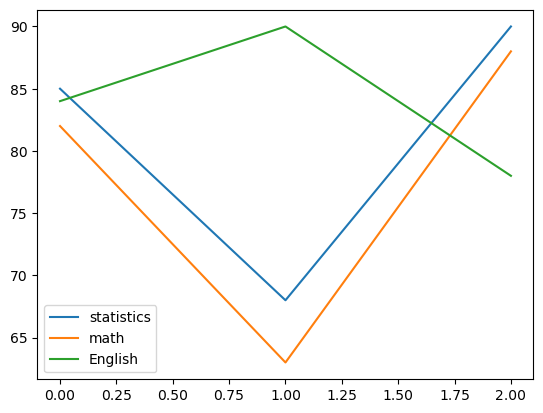

In [127]:
df.plot()

从上图可以看出，Pandas 的``plot``默认对每一列数据，画一个线图。

<Axes: title={'center': 'My picture'}>

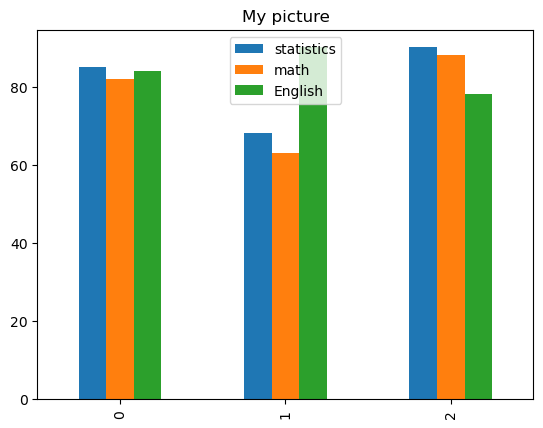

In [128]:
df.plot(kind="bar", title="My picture")  # 画出柱状图

array([<Axes: title={'center': 'statistics'}>,
       <Axes: title={'center': 'math'}>,
       <Axes: title={'center': 'English'}>], dtype=object)

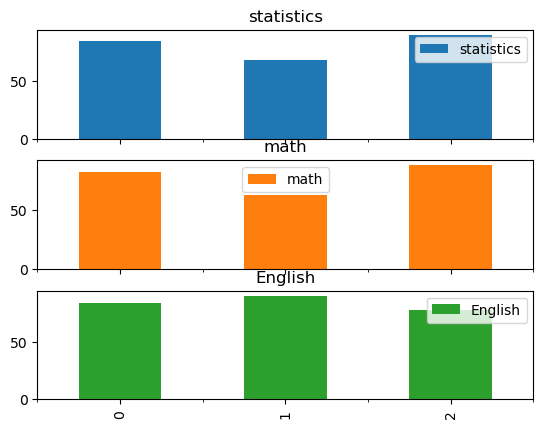

In [129]:
df.plot(kind="bar", subplots=True)  # 对每一列数据非别生成一个子图

<Axes: xlabel='math', ylabel='statistics'>

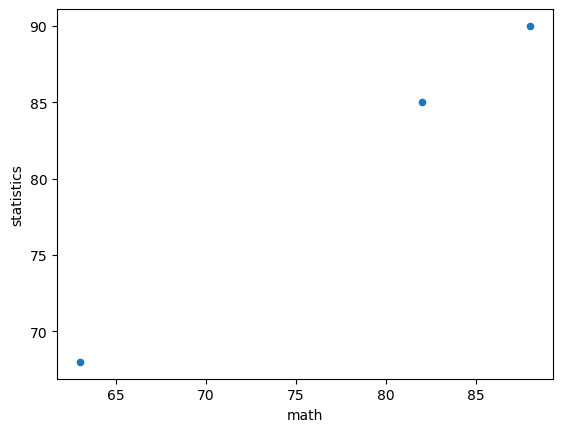

In [130]:
df.plot(x="math", y="statistics", kind="scatter")  # 指定横坐标与纵坐标，生成一个散点图

```{admonition} tip
:class: tip
pandas 有大量处理数据的函数以及众多参数设置，限于篇幅关系，本书不详细赘述。读者使用 pandas 处理数据时，可以进一步查阅官方文档。
```

## 练习
<hr>

```{exercise}
:label: pandas-read
自定义一个包含10个学生，3门课程的成绩单 excel 文件，其中包含不及格的数据。用 pandas 读取该文件，剔除有成绩不及格的学生条目，并输出剩下成绩单各科目的平均成绩，最高成绩；最后将剩下学生所有科目的平均成绩排序并输出名次。
```

<script src="https://giscus.app/client.js"
        data-repo="robinchen121/book-Python-Data-Science"
        data-repo-id="R_kgDOKFdyOw"
        data-category="Announcements"
        data-category-id="DIC_kwDOKFdyO84CgWHi"
        data-mapping="pathname"
        data-strict="0"
        data-reactions-enabled="1"
        data-emit-metadata="0"
        data-input-position="bottom"
        data-theme="light"
        data-lang="en"
        crossorigin="anonymous"
        async>
</script>

<!-- Toogle google translation -->
<div id="google_translate_element"></div>
<script type="text/javascript">
      function googleTranslateElementInit() {
        new google.translate.TranslateElement({ pageLanguage: 'zh-CN',
                  includedLanguages: 'en,zh-CN,zh-TW,ja,ko,de,ru,fr,es,it,pt,hi,ar,fa',
layout: google.translate.TranslateElement.InlineLayout.SIMPLE }, 'google_translate_element');
      }
</script>
<script type="text/javascript"
      src="https://translate.google.com/translate_a/element.js?cb=googleTranslateElementInit"
></script>
<br>

<script src="https://giscus.app/client.js"
        data-repo="robinchen121/book-Python-Data-Science"
        data-repo-id="R_kgDOKFdyOw"
        data-category="Announcements"
        data-category-id="DIC_kwDOKFdyO84CgWHi"
        data-mapping="pathname"
        data-strict="0"
        data-reactions-enabled="1"
        data-emit-metadata="0"
        data-input-position="bottom"
        data-theme="light"
        data-lang="en"
        crossorigin="anonymous"
        async>
</script>